# Automated Analysis of XAS *In-Situ* Data w. Measured Standards
Notebook showing an example workflow used for automatic analysis of XAS *in-situ* data when standards for both unreduced precursors and reduced metal foils have been measured on the same instrument.

This notebook should only be considered as a help and guide for performing automatic analysis of XAS data. 
It is therefore encouraged to make modifications to the notebook to fit your specific needs.

# Imports
Here the required packages and functions are imported.

Whether plots are interactive is also changed here. 

In [1]:
# Functions written for the analysis of XAS data
from autoXAS.data import *
from autoXAS.LCA import *
from autoXAS.plotting import *

%matplotlib inline

# Global variables

In [2]:
synchrotron = 'BALDER_2'

# Boolean flags
Here the values of boolean flags (True/False) that occur throughout the notebook can be changed.

In [3]:
# Decide if transmission or absorption data should be used for normalization and analysis
use_transmission = True
# Decide if subtraction of pred-edge should be used for normalization
use_preedge = True
# Decide if plots should be interactive or static
interactive = False

# Standards and preprocessing
Here the measured standards (metal foils and precursors) are loaded and preprocessed. 

This section only needs to be run once, as it applies to all experiments measured on the same instrument.

## Metal foils

In [4]:
# Specify data location
folder_metal_foils = 'C:/MAX_IV/BALDER_Sep2022/MoO2_t-BuOH_150/'

# Load data
df_foils = load_xas_data(
    folder_metal_foils,
    synchrotron=synchrotron, 
    file_selection_condition='ref', 
    negated_condition=False,
)

# Initial data processing
df_foils = processing_df(df_foils, synchrotron=synchrotron, metal='Mo')

# Specify the measurements to use when averaging. 
# This can be given as either a list or a range.
measurements_to_average = range(1,11)

# Create dataframe with the reference spectra for reduced metals
df_foils = average_measurements(df_foils, measurements_to_average)

Loading data: 100%|██████████| 1/1 [00:00<00:00, 28.56it/s, Currently loading Mo_foil_ref.dat]


### Edge energy corrections
The energy shifts of the different edges are systematic errors from the instrument. Therefore the shift is consistent across measurements and we can correct the measured data using the theoretical edge energies.

In [5]:
# Calculate the edge energy shift at each edge
edge_correction_energies = {
    'Pd':calc_edge_correction(df_foils, metal='Pd', edge='K', transmission=use_transmission),
    'Ag':calc_edge_correction(df_foils, metal='Ag', edge='K', transmission=use_transmission),
    'Rh':calc_edge_correction(df_foils, metal='Rh', edge='K', transmission=use_transmission),
    'Ru':calc_edge_correction(df_foils, metal='Ru', edge='K', transmission=use_transmission),
    'Mn':calc_edge_correction(df_foils, metal='Mn', edge='K', transmission=use_transmission),
    'Mo':calc_edge_correction(df_foils, metal='Mo', edge='K', transmission=use_transmission),
    'Ir':calc_edge_correction(df_foils, metal='Ir', edge='L3', transmission=use_transmission),
    'Pt':calc_edge_correction(df_foils, metal='Pt', edge='L3', transmission=use_transmission),
    }

### Normalization
Normalization includes correcting the energy shifts, subtraction by the minimum measured value and division by a fit to the post-edge data. A fit to the pre-edge data can also be used to subtract from the data, but can sometimes lead to overcorrections. 

The pre- and post-edge fits can be visually inspected using the "plot_non_normalized_xas()" function with the optional arguments "pre_edge=True" and "post_edge=True". 

All normalization of data **must** use the same normalization procedure!

In [6]:
# Normalization of the data
normalize_data(
    df_foils, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission,
)
df_foils.head()

,Filename,Experiment,Measurement,Start Time,End Time,albaem02_ch1,albaem02_ch2,albaem02_ch3,albaem02_ch4,Metal,Precursor,Relative Time,Energy,Temperature,Absorption,Transmission,Energy_Corrected,Normalized,pre_edge,post_edge
0,Mo_foil_ref.dat,Mo_foil,1,2022-09-29 13:30:14,2022-09-29 13:30:21,0.000001,4.501713e-07,0.000003,0.000005,Mo,Avg,0.0,19920.0,0.0,0.0,0.197665,19908,0.001594,-0.000714,0.447210
1,Mo_foil_ref.dat,Mo_foil,1,2022-09-29 13:30:14,2022-09-29 13:30:21,0.000001,4.518426e-07,0.000003,0.000005,Mo,Avg,0.0,19921.0,0.0,0.0,0.197672,19909,0.001498,-0.000664,0.446998
2,Mo_foil_ref.dat,Mo_foil,1,2022-09-29 13:30:14,2022-09-29 13:30:21,0.000001,4.543980e-07,0.000003,0.000005,Mo,Avg,0.0,19922.0,0.0,0.0,0.197665,19910,0.001371,-0.000613,0.446786
3,Mo_foil_ref.dat,Mo_foil,1,2022-09-29 13:30:14,2022-09-29 13:30:21,0.000001,4.513730e-07,0.000003,0.000005,Mo,Avg,0.0,19923.0,0.0,0.0,0.197685,19911,0.001305,-0.000563,0.446574
4,Mo_foil_ref.dat,Mo_foil,1,2022-09-29 13:30:14,2022-09-29 13:30:21,0.000001,4.528214e-07,0.000003,0.000005,Mo,Avg,0.0,19924.0,0.0,0.0,0.197678,19912,0.001178,-0.000513,0.446362


### Plotting
It is always a good idea to visually inspect the data to see if it behaves as it should.

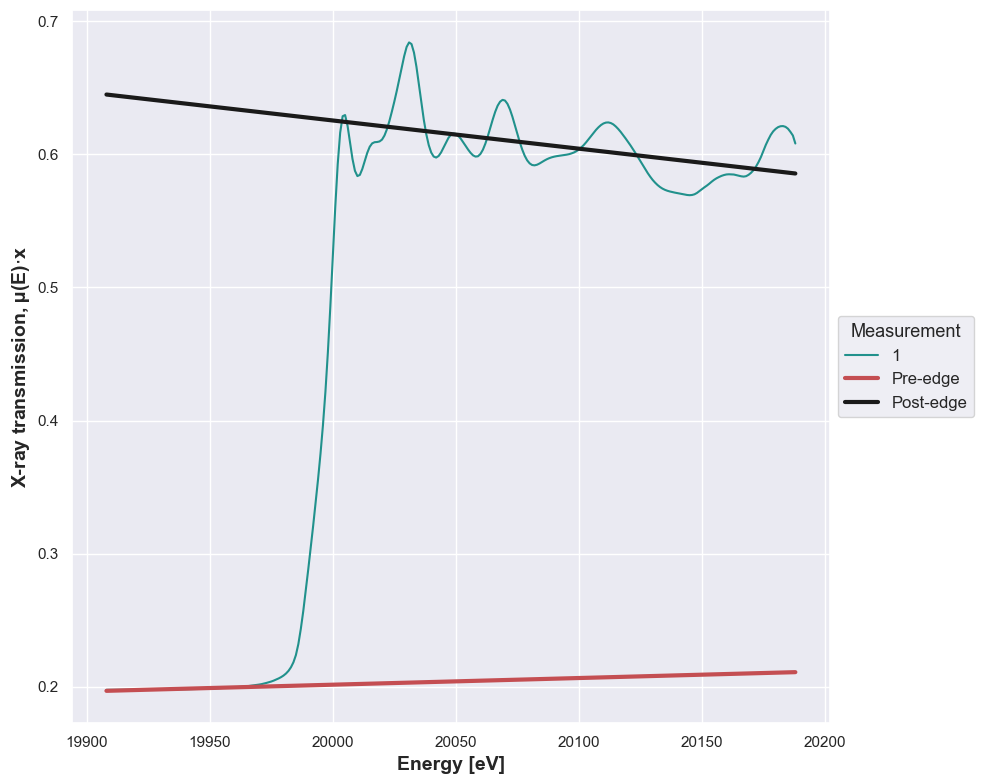

In [7]:
plot_non_normalized_xas(
    df_foils, 
    'Mo_foil', 
    pre_edge=True, 
    post_edge=True, 
    transmission=use_transmission, 
    interactive=interactive
)

## Precursors

In [8]:
# Specify data loccation
folder_precursor_standards = 'C:/MAX_IV/BALDER_Sep2022/ReferencePellets/'

# Load data
df_precursors = load_xas_data(
    folder_precursor_standards, 
    synchrotron=synchrotron, 
    file_selection_condition='MoCl5', 
    negated_condition=False,
)

# Initial data processing
df_precursors = processing_df(df_precursors, synchrotron=synchrotron, metal='Mo')

# Specify the measurements to use when averaging. 
# This can be given as either a list or a range.
measurements_to_average = range(1,11)

# Create dataframe with the reference spectra for reduced metals
df_precursors = average_measurements(df_precursors, measurements_to_average)

Loading data: 100%|██████████| 2/2 [00:00<00:00, 32.26it/s, Currently loading MoCl5_inert_ref.dat]


### Normalization

In [9]:
# Normalization of the data
normalize_data(
    df_precursors, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission
)
df_precursors.head()

,Filename,Experiment,Measurement,Start Time,End Time,albaem02_ch1,albaem02_ch2,albaem02_ch3,albaem02_ch4,Metal,Precursor,Relative Time,Energy,Temperature,Absorption,Transmission,Energy_Corrected,Normalized,pre_edge,post_edge
0,MoCl5_air_ref.dat,MoCl5_air,1,2022-09-28 16:07:08,2022-09-28 16:07:16,0.000001,4.428413e-07,0.000003,0.000005,Mo,Avg,0.0,19920.0,0.0,0.0,0.186965,19908,0.001501,-0.000369,0.301521
1,MoCl5_air_ref.dat,MoCl5_air,1,2022-09-28 16:07:08,2022-09-28 16:07:16,0.000001,4.433179e-07,0.000003,0.000005,Mo,Avg,0.0,19921.0,0.0,0.0,0.186930,19909,0.001302,-0.000344,0.301347
2,MoCl5_air_ref.dat,MoCl5_air,1,2022-09-28 16:07:08,2022-09-28 16:07:16,0.000001,4.437805e-07,0.000003,0.000005,Mo,Avg,0.0,19922.0,0.0,0.0,0.186932,19910,0.001229,-0.000319,0.301174
3,MoCl5_air_ref.dat,MoCl5_air,1,2022-09-28 16:07:08,2022-09-28 16:07:16,0.000001,4.434748e-07,0.000003,0.000005,Mo,Avg,0.0,19923.0,0.0,0.0,0.186921,19911,0.001110,-0.000295,0.301000
4,MoCl5_air_ref.dat,MoCl5_air,1,2022-09-28 16:07:08,2022-09-28 16:07:16,0.000001,4.425758e-07,0.000003,0.000005,Mo,Avg,0.0,19924.0,0.0,0.0,0.186930,19912,0.001058,-0.000270,0.300827


### Plotting
It is always a good idea to visually inspect the data to see if it behaves as it should.

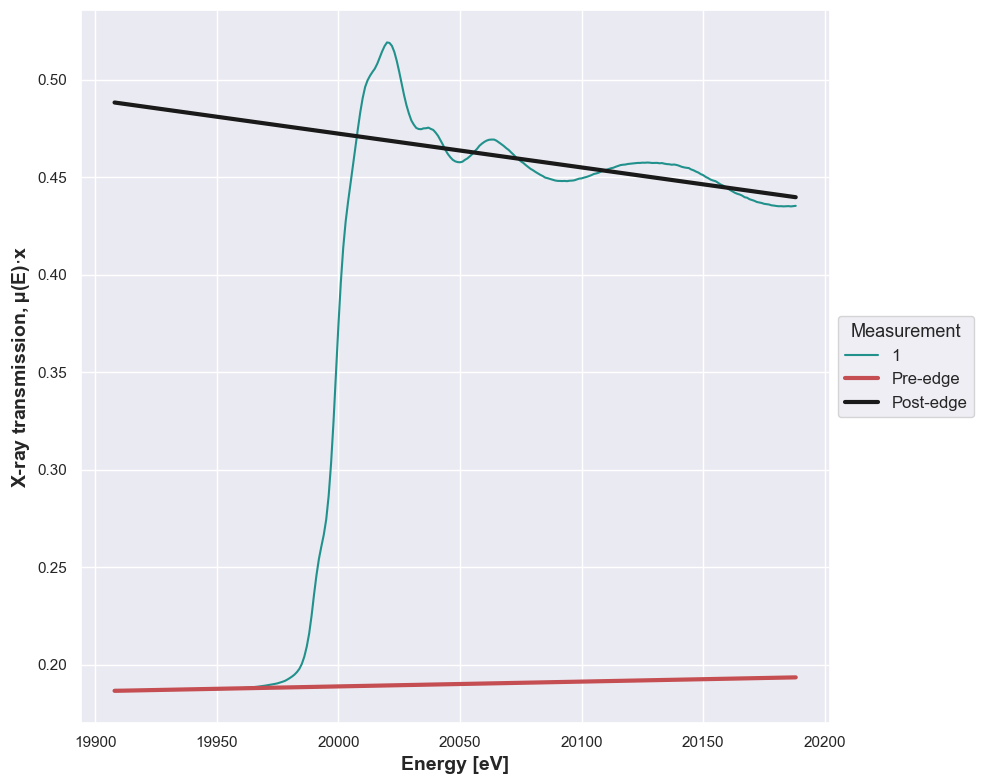

In [10]:
plot_non_normalized_xas(df_precursors, 'MoCl5_air', pre_edge=True, post_edge=True, transmission=use_transmission, interactive=interactive)

## Products

In [11]:
# Specify data loccation
folder_products_standards = 'C:/MAX_IV/BALDER_Sep2022/ReferencePellets/'

# Load data
df_products = load_xas_data(
    folder_products_standards, 
    synchrotron=synchrotron, 
    file_selection_condition='MoO2', 
    negated_condition=False,
)

# Initial data processing
df_products = processing_df(df_products, synchrotron=synchrotron, metal='Mo')

# Specify the measurements to use when averaging. 
# This can be given as either a list or a range.
measurements_to_average = range(1,11)

# Create dataframe with the reference spectra for reduced metals
df_products = average_measurements(df_products, measurements_to_average)

Loading data: 100%|██████████| 8/8 [00:00<00:00, 32.76it/s, Currently loading MoO2_T-BuOH_ref.dat]


### Normalization

In [12]:
# Normalization of the data
normalize_data(
    df_products, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission
)
df_products.head()

,Filename,Experiment,Measurement,Start Time,End Time,albaem02_ch1,albaem02_ch2,albaem02_ch3,albaem02_ch4,Metal,Precursor,Relative Time,Energy,Temperature,Absorption,Transmission,Energy_Corrected,Normalized,pre_edge,post_edge
0,MoO2Cl2_air_ref.dat,MoO2Cl2_air,1,2022-09-28 13:14:13,2022-09-28 13:14:22,0.000001,4.397590e-07,0.000004,0.000006,Mo,Avg,0.0,19920.0,0.0,0.0,0.148921,19908,0.002705,0.000219,0.038123
1,MoO2Cl2_air_ref.dat,MoO2Cl2_air,1,2022-09-28 13:14:13,2022-09-28 13:14:22,0.000001,4.416349e-07,0.000004,0.000006,Mo,Avg,0.0,19921.0,0.0,0.0,0.148893,19909,0.002063,0.000216,0.038100
2,MoO2Cl2_air_ref.dat,MoO2Cl2_air,1,2022-09-28 13:14:13,2022-09-28 13:14:22,0.000001,4.398419e-07,0.000004,0.000006,Mo,Avg,0.0,19922.0,0.0,0.0,0.148901,19910,0.002348,0.000213,0.038077
3,MoO2Cl2_air_ref.dat,MoO2Cl2_air,1,2022-09-28 13:14:13,2022-09-28 13:14:22,0.000001,4.430335e-07,0.000004,0.000006,Mo,Avg,0.0,19923.0,0.0,0.0,0.148883,19911,0.001983,0.000209,0.038054
4,MoO2Cl2_air_ref.dat,MoO2Cl2_air,1,2022-09-28 13:14:13,2022-09-28 13:14:22,0.000001,4.411797e-07,0.000004,0.000006,Mo,Avg,0.0,19924.0,0.0,0.0,0.148888,19912,0.002204,0.000206,0.038031


### Plotting
It is always a good idea to visually inspect the data to see if it behaves as it should.

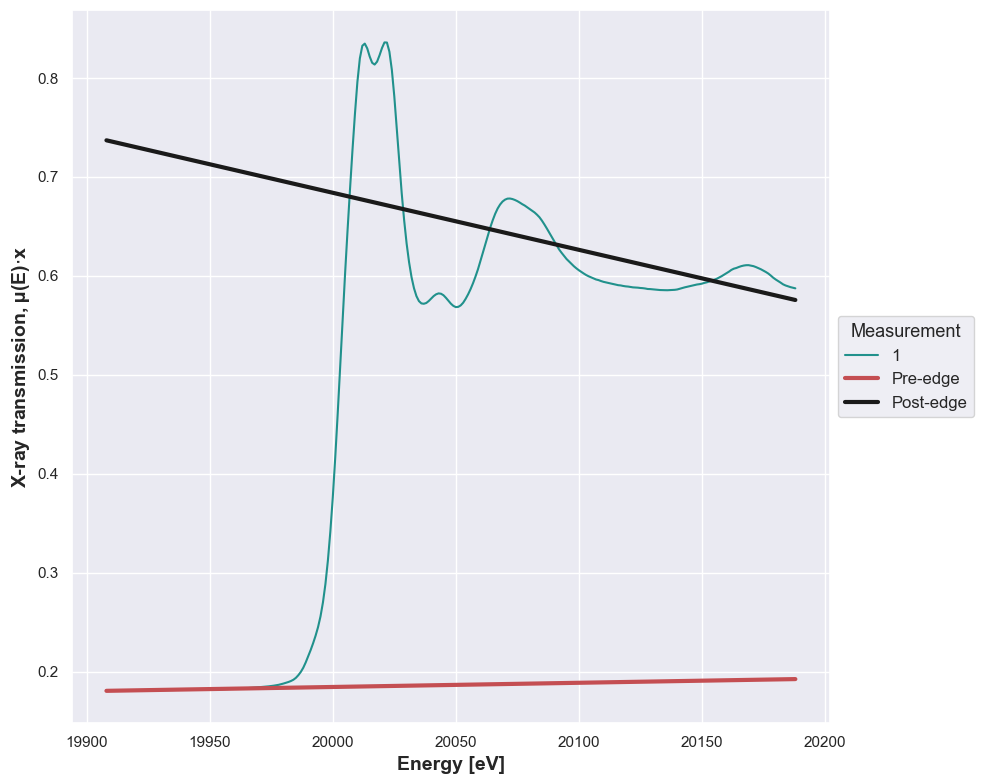

In [13]:
plot_non_normalized_xas(df_products, 'MoO2', pre_edge=True, post_edge=True, transmission=use_transmission, interactive=interactive)

## Intermediates

In [14]:
# Specify data loccation
folder_intermediate_standards = 'C:/MAX_IV/BALDER_Sep2022/ReferencePellets/'

# Load data
df_intermediates = load_xas_data(
    folder_intermediate_standards, 
    synchrotron=synchrotron, 
    file_selection_condition=['MoO2', 'MoCl5','foil'], 
    negated_condition=True,
)

# Initial data processing
df_intermediates = processing_df(df_intermediates, synchrotron=synchrotron, metal='Mo')

# Specify the measurements to use when averaging. 
# This can be given as either a list or a range.
measurements_to_average = range(1,11)

# Create dataframe with the reference spectra for reduced metals
df_intermediates = average_measurements(df_intermediates, measurements_to_average)

Loading data: 100%|██████████| 8/8 [00:00<00:00, 24.83it/s, Currently loading Na2MoO4_ref.dat]     


### Normalization

In [15]:
# Normalization of the data
normalize_data(
    df_intermediates, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission
)
df_intermediates.head()

,Filename,Experiment,Measurement,Start Time,End Time,albaem02_ch1,albaem02_ch2,albaem02_ch3,albaem02_ch4,Metal,Precursor,Relative Time,Energy,Temperature,Absorption,Transmission,Energy_Corrected,Normalized,pre_edge,post_edge
0,ADM_ref.dat,ADM,1,2022-09-28 13:57:31,2022-09-28 13:57:40,0.000001,4.399546e-07,0.000004,0.000005,Mo,Avg,0.0,19920.0,0.0,0.0,0.173736,19908,0.001866,-0.000528,0.302756
1,ADM_ref.dat,ADM,1,2022-09-28 13:57:31,2022-09-28 13:57:40,0.000001,4.394318e-07,0.000004,0.000005,Mo,Avg,0.0,19921.0,0.0,0.0,0.173729,19909,0.001737,-0.000496,0.302620
2,ADM_ref.dat,ADM,1,2022-09-28 13:57:31,2022-09-28 13:57:40,0.000001,4.401744e-07,0.000004,0.000005,Mo,Avg,0.0,19922.0,0.0,0.0,0.173729,19910,0.001631,-0.000464,0.302484
3,ADM_ref.dat,ADM,1,2022-09-28 13:57:31,2022-09-28 13:57:40,0.000001,4.400642e-07,0.000004,0.000005,Mo,Avg,0.0,19923.0,0.0,0.0,0.173726,19911,0.001516,-0.000431,0.302348
4,ADM_ref.dat,ADM,1,2022-09-28 13:57:31,2022-09-28 13:57:40,0.000001,4.407339e-07,0.000004,0.000005,Mo,Avg,0.0,19924.0,0.0,0.0,0.173737,19912,0.001445,-0.000399,0.302212


### Plotting
It is always a good idea to visually inspect the data to see if it behaves as it should.

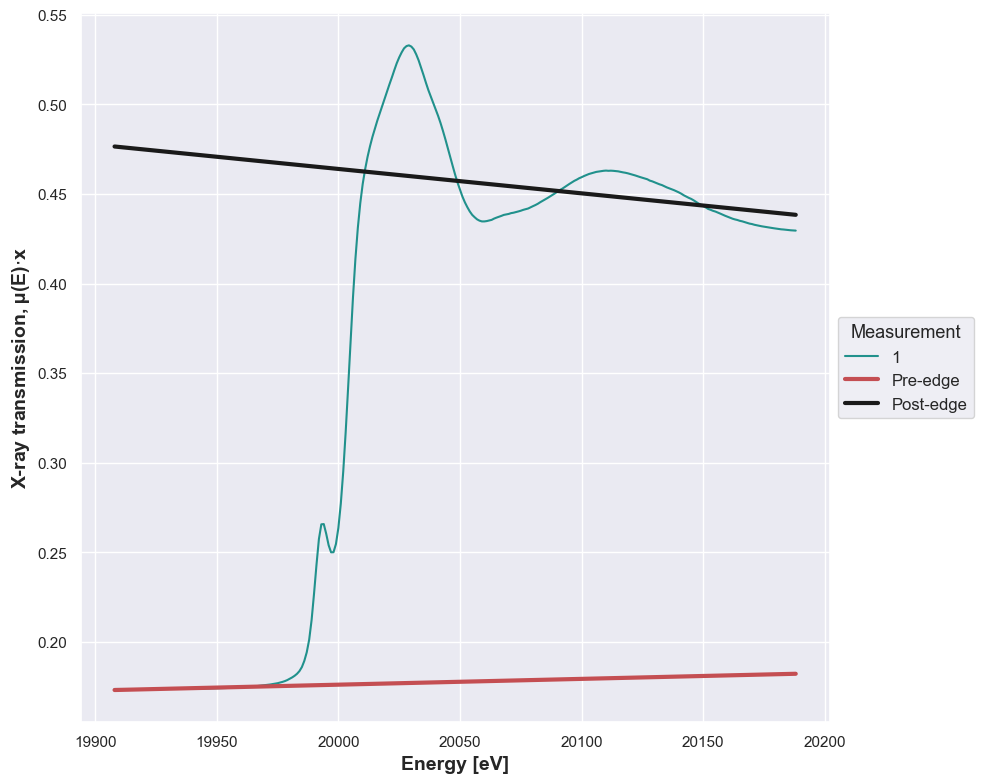

In [16]:
plot_non_normalized_xas(df_intermediates, 'ADM', pre_edge=True, post_edge=True, transmission=use_transmission, interactive=interactive)

# Experiments
Here the measured data from different experiments are loaded, preprocessed and analysed. 

This section needs to be run every time a new experiment is analysed.

## Preprocessing

### Single dataset
Use either this section or *Stiching together datasets*.

In [17]:
# Specify data location
folder_XAS_data = 'C:/MAX_IV/BALDER_Sep2022/MoO2_BeOH_150_2/'

# Load data
df_data = load_xas_data(
    folder_XAS_data, 
    synchrotron=synchrotron, 
    file_selection_condition='_3', 
    negated_condition=False,
)

# Initial data processing
df_data = processing_df(df_data, synchrotron=synchrotron, metal='Mo')

Loading data: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s, Currently loading MoO2_BeOH_150_3.dat]


### Stiching together datasets
Use either this section or *Single dataset*.

In [18]:
# # Specify all data locations
# list_of_folders = [
#     'C:/MAX_IV/BALDER_Sep2022/MoO2_BeOH_200_aged_2/',
# ]

# # Create empty list to hold all datasets
# list_of_datasets = []

# # Load data
# for folder in list_of_folders:
#     df_data = load_xas_data(
#         folder, 
#         synchrotron=synchrotron, 
#         file_selection_condition='aged_2', 
#         negated_condition=False, 
#         verbose=False,
#     )

#     # Initial data processing
#     df_data = processing_df(df_data, synchrotron=synchrotron, metal='Mo')

#     # Append to list of datasets
#     list_of_datasets.append(df_data)

# # Combine the datasets
# df_data = combine_datasets(list_of_datasets)

### Normalization

In [19]:
# Normalization of the data
normalize_data(
    df_data, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission
)
df_data.head()

,Filename,Experiment,Measurement,Start Time,End Time,albaem02_ch1,albaem02_ch2,albaem02_ch3,albaem02_ch4,Metal,Precursor,Relative Time,Energy,Temperature,Absorption,Transmission,Energy_Corrected,Normalized,pre_edge,post_edge
0,MoO2_BeOH_150_3.dat,MoO2_BeOH_150_3,1,2022-09-29 06:53:19,2022-09-29 06:53:25,5.075561e-11,-6.604942e-11,-1.310481e-11,2.576015e-10,Mo,O2_BeOH_150_3,0.0,19920.0,0,0,-0.062552,19908,-1.328818,0.450388,0.319095
1,MoO2_BeOH_150_3.dat,MoO2_BeOH_150_3,1,2022-09-29 06:53:19,2022-09-29 06:53:25,4.369246e-11,-7.932780e-11,-5.025752e-11,2.133396e-10,Mo,O2_BeOH_150_3,0.0,19921.0,0,0,-0.218512,19909,-0.136273,0.451002,0.319709
2,MoO2_BeOH_150_3.dat,MoO2_BeOH_150_3,1,2022-09-29 06:53:19,2022-09-29 06:53:25,2.271715e-11,-8.250305e-11,-4.699588e-11,2.226355e-10,Mo,O2_BeOH_150_3,0.0,19922.0,0,0,-0.340389,19910,0.796686,0.451615,0.320322
3,MoO2_BeOH_150_3.dat,MoO2_BeOH_150_3,1,2022-09-29 06:53:19,2022-09-29 06:53:25,2.328451e-11,-8.944150e-11,-7.838993e-11,2.002240e-10,Mo,O2_BeOH_150_3,0.0,19923.0,0,0,-0.543009,19911,2.344619,0.452228,0.320935
4,MoO2_BeOH_150_3.dat,MoO2_BeOH_150_3,1,2022-09-29 06:53:19,2022-09-29 06:53:25,2.188073e-11,-8.636852e-11,-7.115171e-11,1.914170e-10,Mo,O2_BeOH_150_3,0.0,19924.0,0,0,-0.536213,19912,2.297528,0.452841,0.321548


#### Saving results as .csv file

In [20]:
# save_data(df_data, filename='MoO2_t-BuOH_200_normalized.csv')

## Data inspection
It is always a good idea to visually inspect the data to see if it behaves as it should.

In [21]:
# Product pellets are shifted -3 eV to align with expectation
df_products['Energy_Corrected'] = df_products['Energy_Corrected'] - 2

# Product pellets are shifted -3 eV to align with expectation
df_data['Energy_Corrected'] = df_data['Energy_Corrected'] + 3

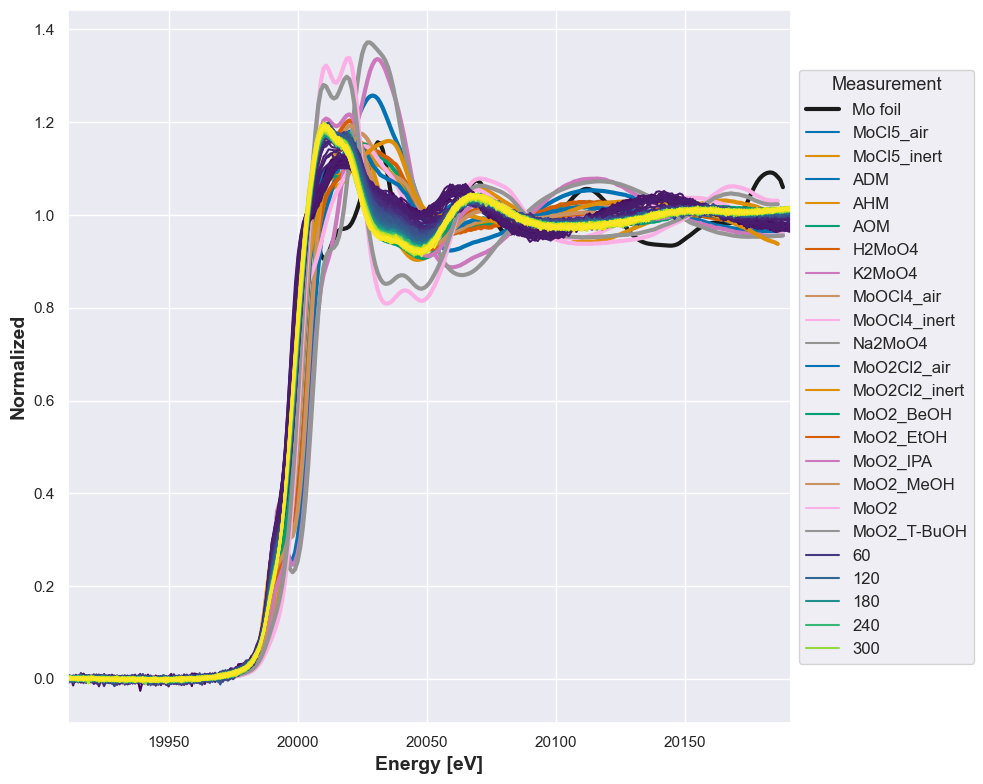

In [22]:
plot_data(
    df_data[df_data['Measurement'] > 4], 
    metal='Mo', 
    foils=df_foils, 
    products=df_products, 
    intermediates=df_intermediates, 
    precursors=df_precursors, 
    precursor_suffix=None, 
    interactive=interactive
)

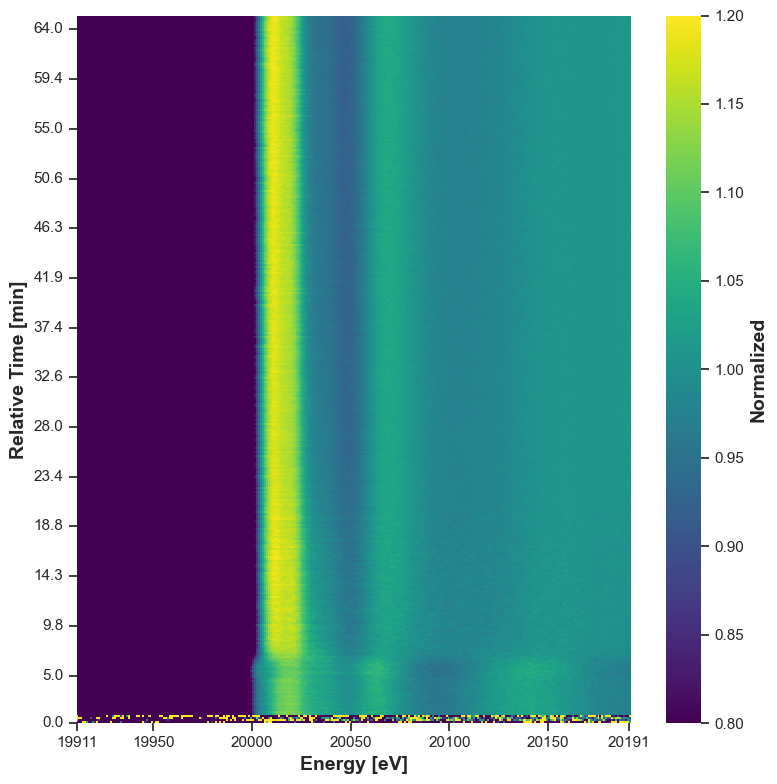

In [96]:
plot_insitu_waterfall(
    df_data, 
    experiment='MoO2_BeOH_150_3', 
    # lines=[5,33,109],
    vmin=0.8, 
    vmax=1.2, 
    y_axis='Relative Time',
    time_unit='m',
    interactive=interactive,
)

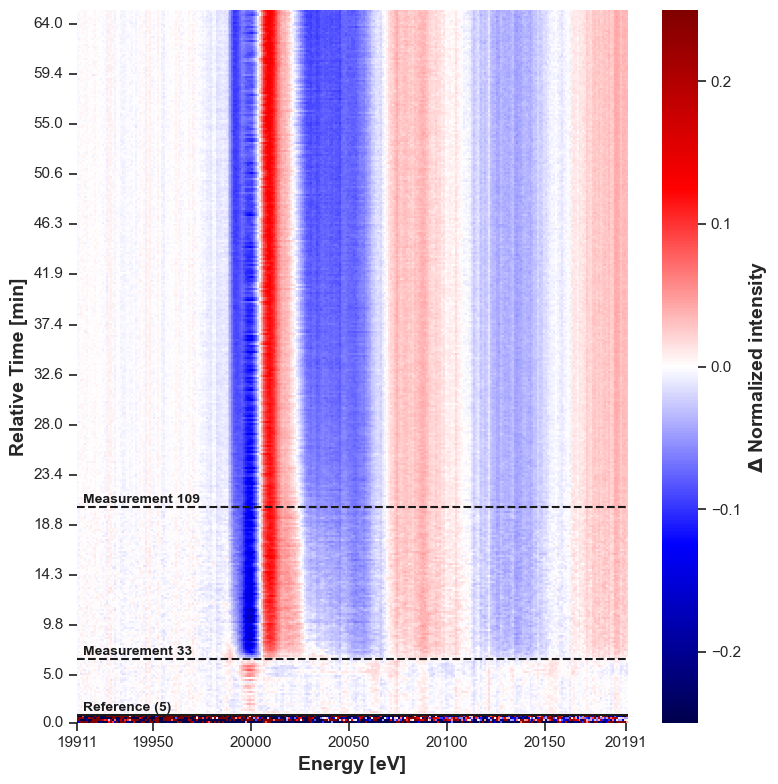

In [97]:
plot_insitu_change(
    df_data, 
    experiment='MoO2_BeOH_150_3', 
    reference_measurement=5,
    lines=[33,109],
    vmin=-0.25, 
    vmax=0.25, 
    y_axis='Relative Time',
    time_unit='m',
    interactive=interactive,
)

## Linear combination analysis
This section performs linear combination analysis (LCA) of every combination of two-component systems consisting of 1 metal foil and 1 precursor (with the same metal). 

The estimated uncertainties of the dependent parameter behaves weird when the independent parameter is approximately zero. This is fixed in the "StdCorrected" column by using the same uncertainty for both parameters.

### LCA using external reference
LCA where the components used are measured references or averages of measurements. The components to fit with should be given as seperate dataframes.

In [81]:
df_results = linear_combination_analysis(
    data = df_data, 
    precursors = df_precursors, 
    # intermediates = df_intermediates,
    products = df_products, 
    fit_min = 19985, 
    fit_max = 20050,
)
df_results.head()

LCA progress: 100%|██████████| 16/16 [00:44<00:00,  2.78s/it, Analysing MoCl5_inert + MoO2_T-BuOH]  


,Experiment,Metal,Product,Intermediate,Precursor,Precursor Type,Measurement,Temperature,Temperature Average,Temperature Std,Parameter,Value,StdErr,StdCorrected,Energy Range,Basis Function
0,MoCl5_air + MoO2Cl2_air,Mo,MoO2Cl2_air,None,MoCl5_air,Cl5_air,1,0.0,0,0,product_weight,7.028925e-01,1.217515,1.217515,"[19985, 19986, 19987, 19988, 19989, 19990, 199...","[0.03809583001391553, 0.048391698822293765, 0...."
1,MoCl5_air + MoO2Cl2_air,Mo,MoO2Cl2_air,None,MoCl5_air,Cl5_air,1,0.0,0,0,precursor_weight,2.971075e-01,1.217515,1.217515,"[19985, 19986, 19987, 19988, 19989, 19990, 199...","[0.04179509240136828, 0.05456710224657661, 0.0..."
2,MoCl5_air + MoO2Cl2_air,Mo,MoO2Cl2_air,None,MoCl5_air,Cl5_air,2,0.0,0,0,product_weight,1.000000e+00,0.001065,0.001065,"[19985, 19986, 19987, 19988, 19989, 19990, 199...","[0.03809583001391553, 0.048391698822293765, 0...."
3,MoCl5_air + MoO2Cl2_air,Mo,MoO2Cl2_air,None,MoCl5_air,Cl5_air,2,0.0,0,0,precursor_weight,2.986500e-14,0.001065,0.001065,"[19985, 19986, 19987, 19988, 19989, 19990, 199...","[0.04179509240136828, 0.05456710224657661, 0.0..."
4,MoCl5_air + MoO2Cl2_air,Mo,MoO2Cl2_air,None,MoCl5_air,Cl5_air,3,0.0,0,0,product_weight,1.665335e-16,0.000018,0.000018,"[19985, 19986, 19987, 19988, 19989, 19990, 199...","[0.03809583001391553, 0.048391698822293765, 0...."


In [76]:
# df_results = linear_combination_analysis(
#     data = df_data, 
#     precursors = df_precursors, 
#     products = df_products, 
# )
# df_results.head()

LCA progress: 100%|██████████| 16/16 [00:44<00:00,  2.78s/it, Analysing MoCl5_inert + MoO2_T-BuOH]  


,Experiment,Metal,Product,Intermediate,Precursor,Precursor Type,Measurement,Temperature,Temperature Average,Temperature Std,Parameter,Value,StdErr,StdCorrected,Energy Range,Basis Function
0,MoCl5_air + MoO2Cl2_air,Mo,MoO2Cl2_air,None,MoCl5_air,Cl5_air,1,0.0,0,0,product_weight,9.999986e-01,2.024403,2.024403,"[19911, 19912, 19913, 19914, 19915, 19916, 199...","[0.0019343540174926372, 0.0018845640198797053,..."
1,MoCl5_air + MoO2Cl2_air,Mo,MoO2Cl2_air,None,MoCl5_air,Cl5_air,1,0.0,0,0,precursor_weight,1.362440e-06,2.024403,2.024403,"[19911, 19912, 19913, 19914, 19915, 19916, 199...","[0.0011100889680254143, 0.001058447676073865, ..."
2,MoCl5_air + MoO2Cl2_air,Mo,MoO2Cl2_air,None,MoCl5_air,Cl5_air,2,0.0,0,0,product_weight,2.197296e-10,11.417082,11.417082,"[19911, 19912, 19913, 19914, 19915, 19916, 199...","[0.0019343540174926372, 0.0018845640198797053,..."
3,MoCl5_air + MoO2Cl2_air,Mo,MoO2Cl2_air,None,MoCl5_air,Cl5_air,2,0.0,0,0,precursor_weight,1.000000e+00,0.000000,11.417082,"[19911, 19912, 19913, 19914, 19915, 19916, 199...","[0.0011100889680254143, 0.001058447676073865, ..."
4,MoCl5_air + MoO2Cl2_air,Mo,MoO2Cl2_air,None,MoCl5_air,Cl5_air,3,0.0,0,0,product_weight,1.000000e+00,7.384059,7.384059,"[19911, 19912, 19913, 19914, 19915, 19916, 199...","[0.0019343540174926372, 0.0018845640198797053,..."


### LCA using internal reference
LCA where the components used are measurements from the data. Only the measured experimental data is needed.

In [69]:
# # LCA using specific measurements in the experiment as references
# df_results = LCA_internal(
#     df_data, 
#     initial_state_index = 5, 
#     intermediate_state_index = 54, 
#     final_state_index = 348,
#     fit_min = 19985, 
#     fit_max = 20050
# )
# df_results.head()

#### Saving results as .csv file

In [70]:
# save_data(df_results, filename='LCA_results.csv')

### Results plotting

#### Temperature curves

In [71]:
# plot_temperatures(df_results, with_uncertainty=True, interactive=interactive)

#### Plot of a single LCA fit
Plot showing the measurement that is being fitted, the contributions from the components and the residual.

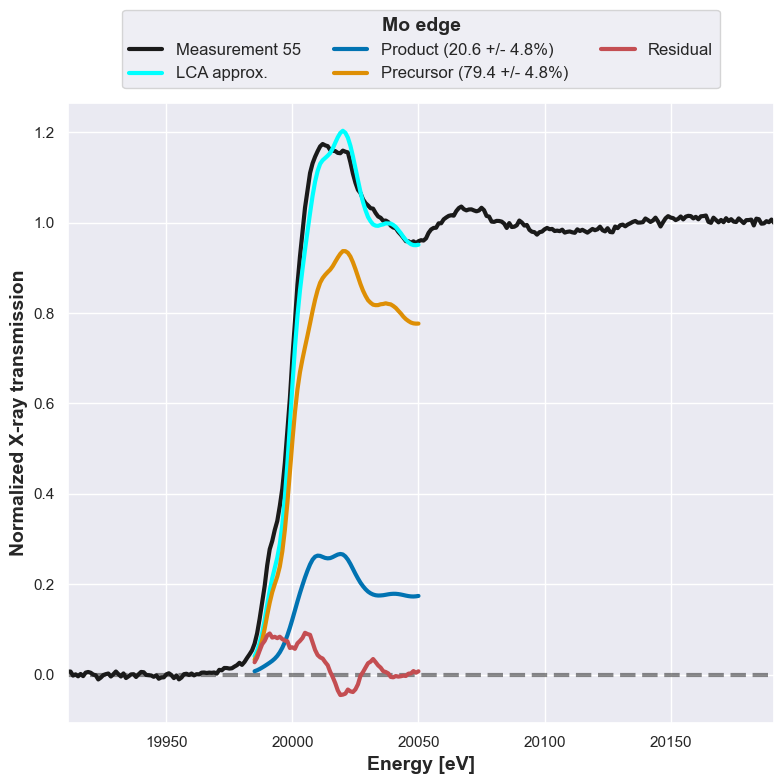

In [82]:
plot_LCA(
    df_results, 
    df_data, 
    experiment='MoCl5_air + MoO2_BeOH',
    measurement=55, 
    interactive=interactive
)

#### Plot of LCA component weights over time
Plot showing how the weight of each component changes over time.

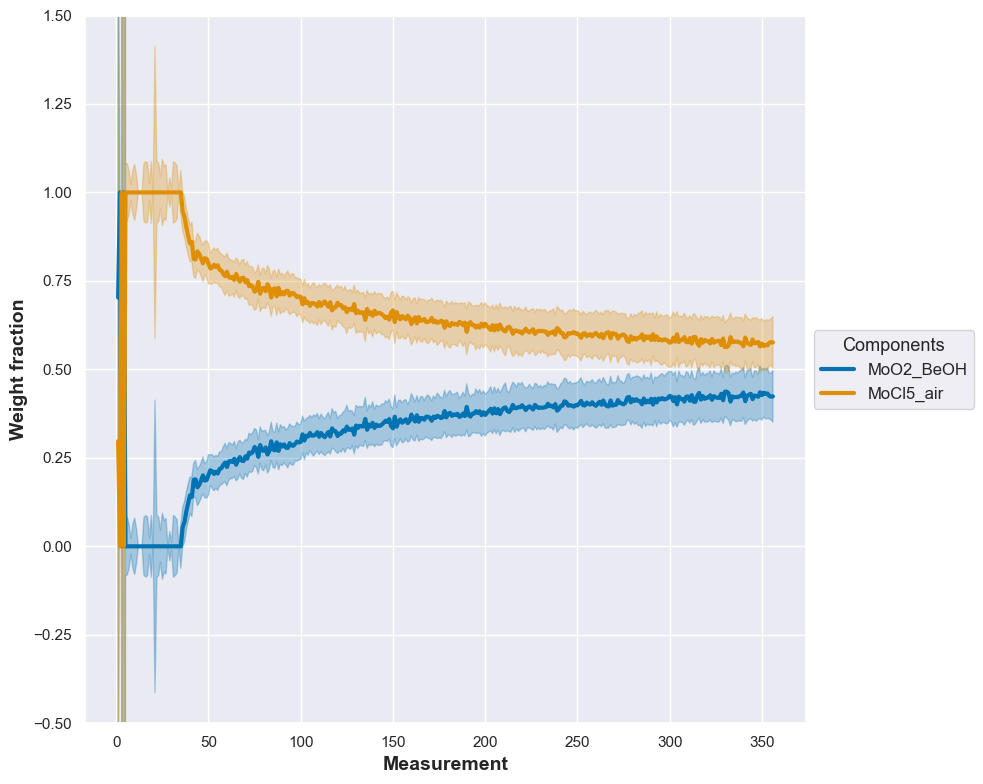

In [83]:
plot_LCA_change(
    df_results, 
    product='MoO2_BeOH', 
    precursor='MoCl5_air', 
    x_axis='Measurement', 
    with_uncertainty=True, 
    interactive=interactive
)

#### Comparison of reduction times of different metals
Plot showing the weight of the metal foil component over time for the different metal species in the sample. 

In [ ]:
# plot_reduction_comparison(df_results, precursor_type='all', x_axis='Measurement', with_uncertainty=True, interactive=interactive)